In [264]:
## Ifeloluwa Esther Bakare studentid B1239012
"""
Created on Tue Apr 21 2022


What this Notebook Contains
1. Data Preparation
2. Exploratory Data Analysis
3. Data Encloding, Feature Selection and  Spliting 
4. Machine Learning Algorithm
5. Oversampling
6. Machine Learning Algorith
7. Comparism

"""

##Aim of this notebook is to build a model to predict i an employee would Leave the place of work or not within 2 years

'\nCreated on Tue Apr 21 2022\n\n\nWhat this Notebook Contains\n1. Data Preparation\n2. Exploratory Data Analysis\n3. Data Encloding, Feature Selection and  Spliting \n4. Machine Learning Algorithm\n5. Oversampling\n6. Machine Learning Algorith\n7. Comparism\n\n'

In [373]:
## for data
import pandas as pd
import numpy as np
import seaborn as sns

## for plotting
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning algorithms
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

## warning catch
import warnings
warnings.filterwarnings("ignore")

In [266]:
## Import data
## Import data from csv to pandas dataframe
df= pd.read_csv("C://Users//ibaka//Downloads//B1239012//Employee.csv")

In [267]:
# Save copy of full dataframe.
df_raw = df.copy()

In [268]:
#data information
print(df.shape)
print("No of Rows: " + str(df.shape[0]) + ", No of Columns: " + str(df.shape[1]))

(4653, 9)
No of Rows: 4653, No of Columns: 9


In [269]:
# View first 10 rows.
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [270]:
# View last 10 rows.
df.tail(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [271]:
#Data information
df.info

<bound method DataFrame.info of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes

In [272]:
# Data summary and description
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [273]:
# Check data types.
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [274]:
# Check column names.
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [275]:
# Save columns into a list.
df_cols = list(df.columns)




#Column list.
df_cols

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain',
 'LeaveOrNot']

In [276]:
# Check for null values.
df.isnull().sum()
#No null value present

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [277]:
df.duplicated().sum()

1889

In [278]:
#Check skewness
df.skew()

JoiningYear                 -0.113462
PaymentTier                 -1.709531
Age                          0.905195
ExperienceInCurrentDomain   -0.162556
LeaveOrNot                   0.657631
dtype: float64

In [279]:
#Check correlation
df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


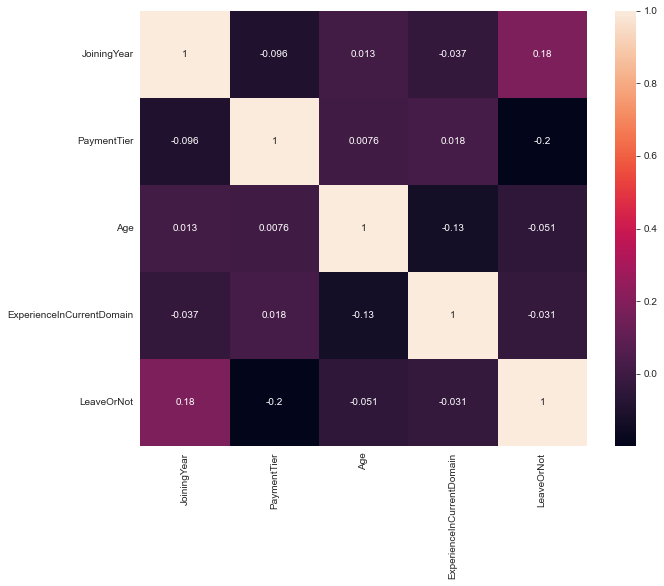

In [280]:
#correlation heat map
f, dfx =plt.subplots(figsize=(10,8))
dfx=sns.heatmap(df.corr(),annot=True)

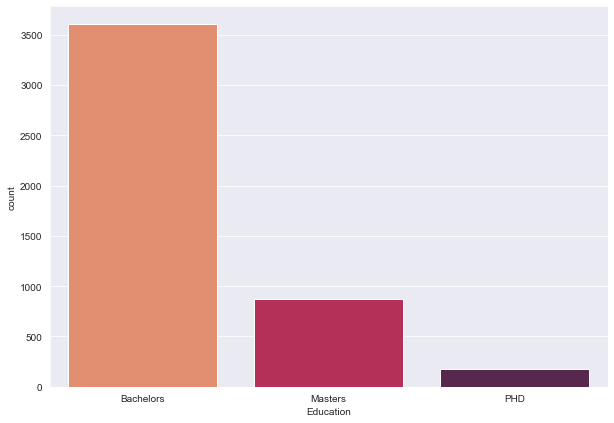

In [281]:
#Univariate exploratory data analysis
#column education
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(df['Education'],palette='rocket_r')
plt.show()

In [282]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [283]:
df['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

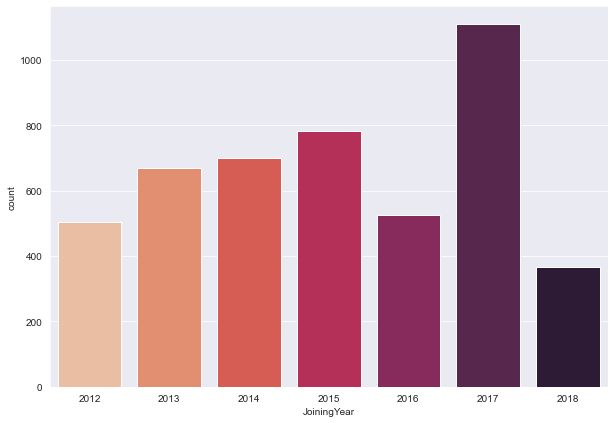

In [284]:
#column joining year
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(df['JoiningYear'],palette='rocket_r')
plt.show()

In [285]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

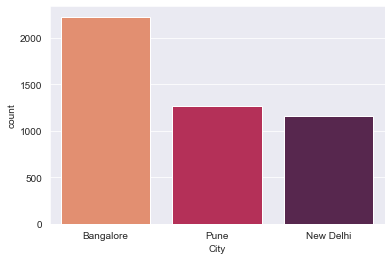

In [286]:
#column city
sns.countplot(x = 'City',data = df,palette='rocket_r')
plt.show()

In [287]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

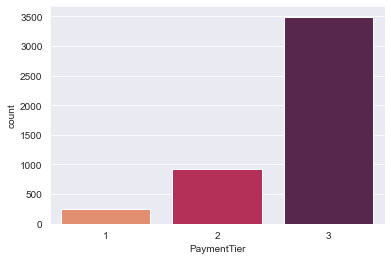

In [288]:
#column payment tier
sns.countplot(x = 'PaymentTier',data = df, palette="rocket_r")
plt.show()

In [289]:
df['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

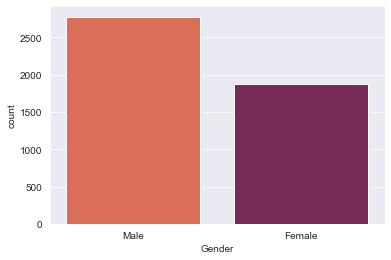

In [290]:
#column gender
sns.countplot(x = 'Gender',data = df, palette ="rocket_r")
plt.show()

In [291]:
df['Age'].value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

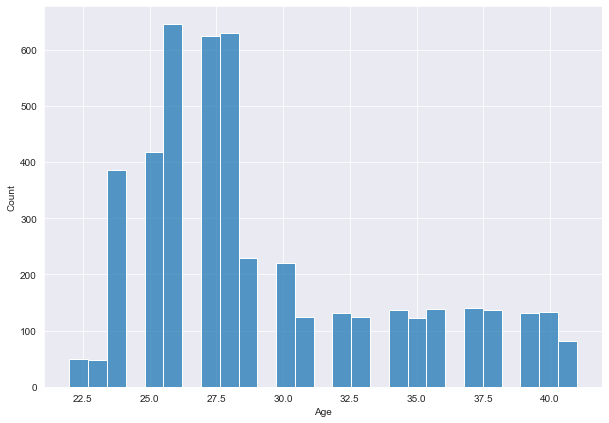

In [292]:
#column age
fig,ax = plt.subplots(figsize=(10,7))
sns.histplot(df['Age'], palette ="rocket_r")
plt.show()

In [293]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

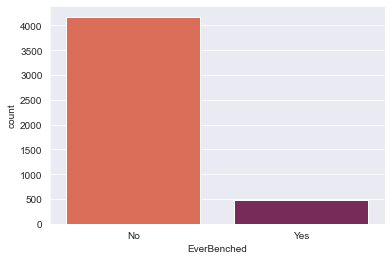

In [294]:
#column everbenched
sns.countplot(x = 'EverBenched',data = df, palette= "rocket_r")
plt.show()

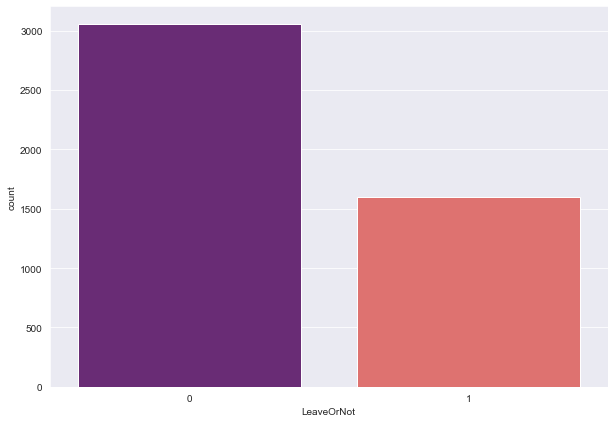

In [295]:
#column leaveornot
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(df['LeaveOrNot'],palette='magma')
plt.show()

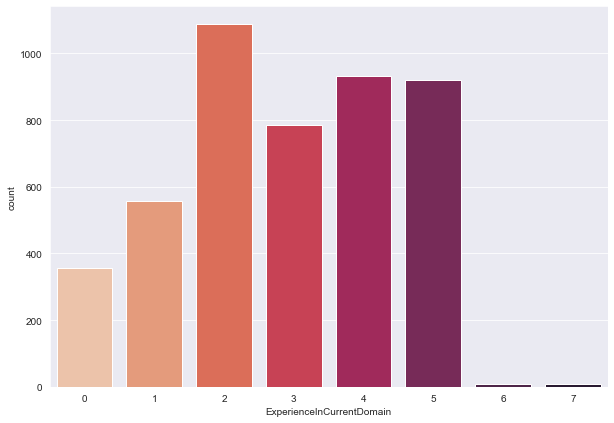

In [296]:
#column experienceincurrentdomain
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(df['ExperienceInCurrentDomain'],palette='rocket_r')
plt.show()

In [297]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

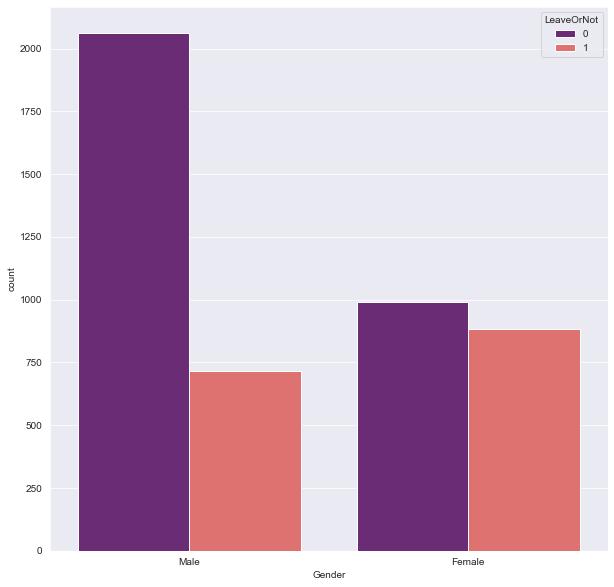

In [298]:
#Bivariate analysis
#proportion of gender that left or not
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df['Gender'],hue='LeaveOrNot',data=df,palette='magma')
plt.show()

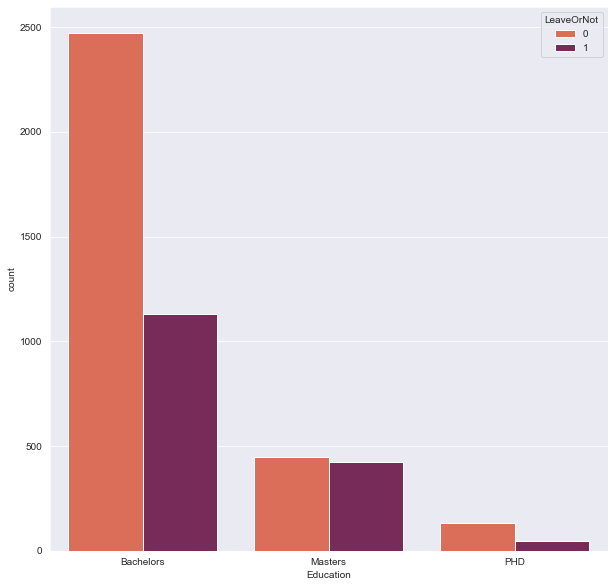

In [299]:
#proportion of education level that left or not
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df['Education'],hue='LeaveOrNot',data=df,palette='rocket_r')
plt.show()

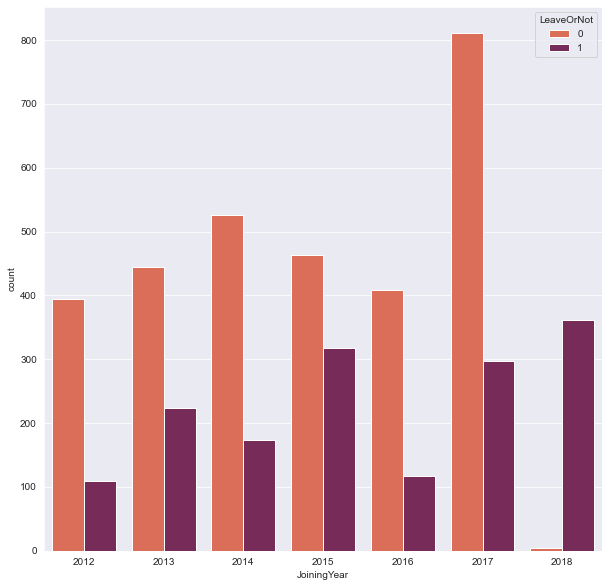

In [300]:
#proportion of joining year that left or not
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df['JoiningYear'],hue='LeaveOrNot',data=df,palette='rocket_r')
plt.show()

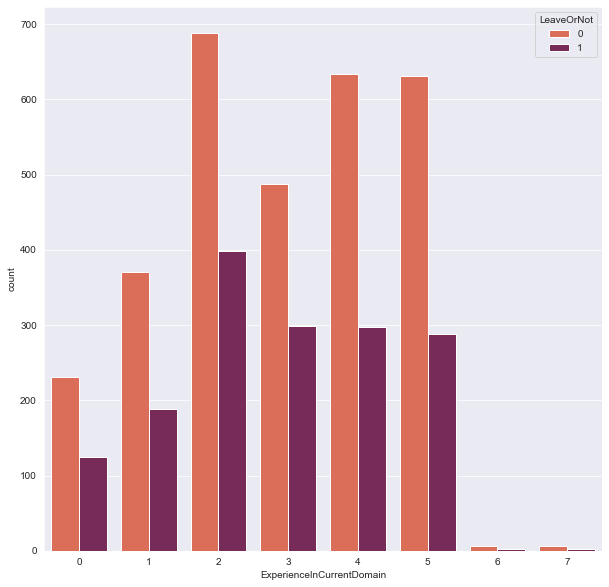

In [301]:
#proportion of experiencelevel that left or not
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df['ExperienceInCurrentDomain'],hue='LeaveOrNot',data=df,palette='rocket_r')
plt.show()

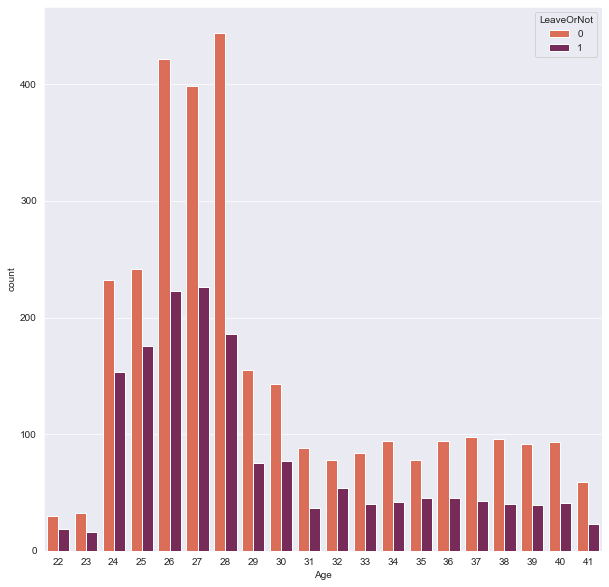

In [302]:
#proportion of age that left or not
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df['Age'],hue='LeaveOrNot',data=df,palette='rocket_r')
plt.show()

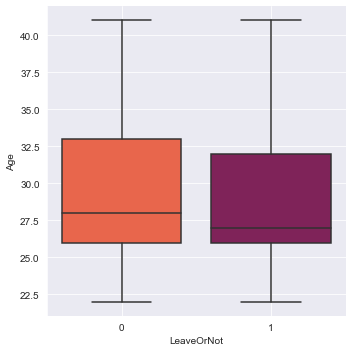

In [303]:
sns.catplot(x='LeaveOrNot',y='Age',kind='box',data=df,palette='rocket_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

In [304]:
#encoding education
print(df['Education'].value_counts())

temp=df['Education']
df['Bachelors']=(temp=='Bachelors')*1
df['Masters']=(temp=='Masters')*1
df['PHD']=(temp=='PHD')*1
df=df.drop('Education',axis=1)
df

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64


,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD
0,2017,Bangalore,3,34,Male,No,0,0,1,0,0
1,2013,Pune,1,28,Female,No,3,1,1,0,0
2,2014,New Delhi,3,38,Female,No,2,0,1,0,0
3,2016,Bangalore,3,27,Male,No,5,1,0,1,0
4,2017,Pune,3,24,Male,Yes,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,Bangalore,3,26,Female,No,4,0,1,0,0
4649,2013,Pune,2,37,Male,No,2,1,0,1,0
4650,2018,New Delhi,3,27,Male,No,5,1,0,1,0
4651,2012,Bangalore,3,30,Male,Yes,2,0,1,0,0


In [305]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [306]:
#encoding city
temp=df['City']
df['Bangalore']=(temp=='Bangalore')*1
df['Pune']=(temp=='Pune')*1
df['New Delhi']=(temp=='New Delhi')*1
df=df.drop('City',axis=1)
df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,Pune,New Delhi
0,2017,3,34,Male,No,0,0,1,0,0,1,0,0
1,2013,1,28,Female,No,3,1,1,0,0,0,1,0
2,2014,3,38,Female,No,2,0,1,0,0,0,0,1
3,2016,3,27,Male,No,5,1,0,1,0,1,0,0
4,2017,3,24,Male,Yes,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,Female,No,4,0,1,0,0,1,0,0
4649,2013,2,37,Male,No,2,1,0,1,0,0,1,0
4650,2018,3,27,Male,No,5,1,0,1,0,0,0,1
4651,2012,3,30,Male,Yes,2,0,1,0,0,1,0,0


In [307]:
#encoding everbenched
df['EverBenched']=(df['EverBenched']=='Yes')*1
df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,Pune,New Delhi
0,2017,3,34,Male,0,0,0,1,0,0,1,0,0
1,2013,1,28,Female,0,3,1,1,0,0,0,1,0
2,2014,3,38,Female,0,2,0,1,0,0,0,0,1
3,2016,3,27,Male,0,5,1,0,1,0,1,0,0
4,2017,3,24,Male,1,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,Female,0,4,0,1,0,0,1,0,0
4649,2013,2,37,Male,0,2,1,0,1,0,0,1,0
4650,2018,3,27,Male,0,5,1,0,1,0,0,0,1
4651,2012,3,30,Male,1,2,0,1,0,0,1,0,0


In [308]:
#encoding gender
df['Gender']=(df['Gender']=='Male')*1
df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,Pune,New Delhi
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,1,0
2,2014,3,38,0,0,2,0,1,0,0,0,0,1
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,1,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,0,0,1,0
4650,2018,3,27,1,0,5,1,0,1,0,0,0,1
4651,2012,3,30,1,1,2,0,1,0,0,1,0,0


In [309]:
#checking datatype
df.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
Gender                       int32
EverBenched                  int32
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Bachelors                    int32
Masters                      int32
PHD                          int32
Bangalore                    int32
Pune                         int32
New Delhi                    int32
dtype: object

In [310]:
df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,Pune,New Delhi
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,1,0
2,2014,3,38,0,0,2,0,1,0,0,0,0,1
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,1,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,0,0,1,0
4650,2018,3,27,1,0,5,1,0,1,0,0,0,1
4651,2012,3,30,1,1,2,0,1,0,0,1,0,0


In [375]:
#train test split
training_features=['JoiningYear', 'PaymentTier', 'Age', 'Gender', 'EverBenched',
       'ExperienceInCurrentDomain', 'Bachelors', 'Masters',
       'PHD', 'Bangalore', 'Pune', 'New Delhi']
target=['LeaveOrNot']

X_train, X_test, Y_train, Y_test= train_test_split(df[training_features],df[target],test_size=0.3,random_state=101)

In [376]:
# 1. KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [377]:
prediction = knn.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [378]:
print(confusion_matrix(Y_test,prediction))

[[897  29]
 [264 206]]


In [379]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       926
           1       0.88      0.44      0.58       470

    accuracy                           0.79      1396
   macro avg       0.82      0.70      0.72      1396
weighted avg       0.81      0.79      0.77      1396



In [380]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    predictions=pred_i.reshape(1396,1)
    error_rate.append(np.mean(predictions != Y_test))

Text(0, 0.5, 'Error Rate')

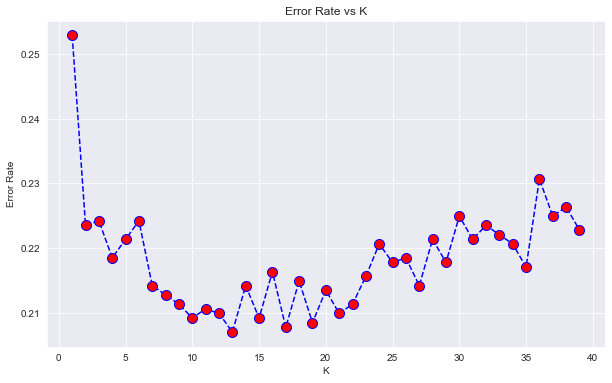

In [381]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [382]:
print(metrics.accuracy_score(Y_test, prediction))

0.7901146131805158


In [383]:
# 2. RandomForestClassifier
randforest= RandomForestClassifier(n_estimators =20, random_state = 0)
randforest.fit(X_train,Y_train)  
y_pred = randforest.predict(X_test)
randforest.score(X_test,Y_test)

0.8194842406876791

In [384]:
#3. LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [385]:
predict = logmodel.predict(X_test)

In [386]:
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       926
           1       0.73      0.45      0.55       470

    accuracy                           0.76      1396
   macro avg       0.75      0.68      0.69      1396
weighted avg       0.75      0.76      0.74      1396

[[846  80]
 [259 211]]


In [387]:
logmodel.score(X_test,Y_test)

0.7571633237822349

In [324]:
# 4. DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)
y_pred = decisiontree.predict(X_test)

In [388]:
confusion_matrix(Y_test, y_pred)

array([[834,  92],
       [160, 310]], dtype=int64)

In [389]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       926
           1       0.77      0.66      0.71       470

    accuracy                           0.82      1396
   macro avg       0.81      0.78      0.79      1396
weighted avg       0.82      0.82      0.82      1396



In [390]:
print(accuracy_score(Y_test, y_pred))

0.8194842406876791


In [391]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decisiontree, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [392]:
decisiontree = grid_search.best_estimator_
y_pred = decisiontree.predict(X_test) 

In [393]:
print(accuracy_score(Y_test, y_pred))

0.832378223495702


In [394]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.8458676128278345


In [395]:
# Adaptive Boost Classification Algorithm
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = decisiontree)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=6)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [397]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 180}
0.8529249646059462


In [398]:
ada = AdaBoostClassifier(base_estimator = decisiontree, algorithm = 'SAMME.R', learning_rate = 0.001, n_estimators = 200)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=2,
                                                         min_samples_split=6),
                   learning_rate=0.001, n_estimators=200)

In [399]:
confusion_matrix(Y_test, y_pred)

array([[877,  49],
       [185, 285]], dtype=int64)

In [400]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       926
           1       0.85      0.61      0.71       470

    accuracy                           0.83      1396
   macro avg       0.84      0.78      0.80      1396
weighted avg       0.84      0.83      0.82      1396



In [401]:
#feature importance
feature = pd.Series(randforest.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.327322
Age                          0.170696
PaymentTier                  0.105832
Gender                       0.090280
ExperienceInCurrentDomain    0.085053
Pune                         0.062259
Masters                      0.041233
Bachelors                    0.037179
Bangalore                    0.029041
New Delhi                    0.023114
EverBenched                  0.021271
PHD                          0.006720
dtype: float64


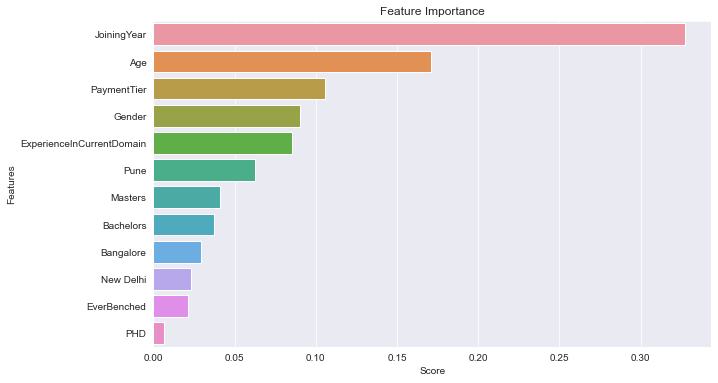

In [402]:
#feature importance bar plot
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

##fig,ax = plt.subplots(figsize=(10,6))
##sns.barplot(x = feature, y = feature.index)
##plt.title("Feature Importance")
##plt.xlabel('Score')
##plt.ylabel('Features')
##plt.show()
##plt.show()

In [403]:
#Oversampling
## Import data
## Import data from csv to pandas dataframe
data = pd.read_csv("C://Users//ibaka//Downloads//B1239012//Employee.csv")

In [404]:
#Data Ecoding
encode = preprocessing.LabelEncoder()

In [405]:
data['Education']=encode.fit_transform(data['Education'])
data['City']=encode.fit_transform(data['City'])
data['Gender']=encode.fit_transform(data['Gender'])
data['EverBenched']=encode.fit_transform(data['EverBenched'])
data['JoiningYear']=encode.fit_transform(data['JoiningYear'])

In [406]:
#Scaling
sc= MinMaxScaler()

In [407]:
 #features
X =pd.DataFrame(sc.fit_transform(data.drop(["LeaveOrNot"],axis = 1)))

In [408]:
#target variables
y= data['LeaveOrNot'].values

In [409]:
sm = SMOTE(random_state=101)

In [410]:
X,y=sm.fit_resample(X, y)

In [411]:
#Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [412]:
##Ml algoriythms
# 1. KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=12)

In [413]:
prediction = knn.predict(X_test)
prediction


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [414]:

print(confusion_matrix(y_test,prediction))

[[811 111]
 [236 674]]


In [415]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       922
           1       0.86      0.74      0.80       910

    accuracy                           0.81      1832
   macro avg       0.82      0.81      0.81      1832
weighted avg       0.82      0.81      0.81      1832



In [416]:
# 2. RandomForestClassifier
randforest= RandomForestClassifier(n_estimators =20, random_state = 0)
randforest.fit(X_train,y_train)  
y_pred = randforest.predict(X_test)
randforest.score(X_test,y_test)


0.8449781659388647

In [417]:
#3. LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [418]:
predict = logmodel.predict(X_test)

In [419]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       922
           1       0.67      0.67      0.67       910

    accuracy                           0.67      1832
   macro avg       0.67      0.67      0.67      1832
weighted avg       0.67      0.67      0.67      1832



In [420]:
print(confusion_matrix(y_test,predict))

[[618 304]
 [302 608]]


In [421]:
logmodel.score(X_test,y_test)

0.6692139737991266

In [422]:
# 4. DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)

In [423]:
confusion_matrix(y_test, y_pred)

array([[791, 131],
       [189, 721]], dtype=int64)

In [424]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       922
           1       0.85      0.79      0.82       910

    accuracy                           0.83      1832
   macro avg       0.83      0.83      0.83      1832
weighted avg       0.83      0.83      0.83      1832



In [426]:
print(accuracy_score(y_test, y_pred))

0.8253275109170306


The End